In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
import warnings 
warnings.filterwarnings('ignore')

In [77]:
data = pd.read_csv('D:/shift academy/Tugas/statistika/train.csv')
pd.set_option('display.max_columns', None)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# a. Tunjukan analisa statistika deskriptif untuk variabel harga rumah (Column Name: SalePrice)

## 1. pengukuran tendency sentral

In [78]:
mean =data.describe()['SalePrice']['mean'] #mean
mean 

180921.19589041095

In [79]:
median = data.describe()['SalePrice']['50%'] #median
median

163000.0

In [80]:
modus = data['SalePrice'].mode()[0] #modus
modus

140000

## 2. Pengukuran Variability

In [81]:
range = data['SalePrice'].max()-data['SalePrice'].min() #jangkauan data
range

720100

In [82]:
standar_deviasi = data.describe()['SalePrice'].std() #standar deviasi
standar_deviasi

237803.79920580913

In [83]:
varian= data['SalePrice'].var() #varian
varian

6311111264.297451

In [84]:
Q1 = data.describe()['SalePrice']['25%'] 
Q1

129975.0

In [85]:
Q3 = data.describe()['SalePrice']['75%']
Q3

214000.0

In [86]:
IQR = data.describe()['SalePrice']['75%']-data.describe()['SalePrice']['25%'] #jangkauan interquartil
IQR

84025.0

# b. Tunjukan analisis statistika deskriptif untuk variabel harga rumah (Column Name: SalePrice) setiap tahunnya (Column Name: YrSold)

Total harga (sum) dari penjualan rumah setiap tahunnya dari tahun 2006-2010

In [87]:
data.groupby('YrSold')['SalePrice'].sum().reset_index()

,YrSold,SalePrice
0,2006,57320530
1,2007,61214777
2,2008,53917695
3,2009,60648051
4,2010,31043893


rata-rata (mean) harga jual dari penjualan rumah setiap tahunnya dari tahun 2006-2010

In [88]:
data.groupby('YrSold')['SalePrice'].mean().reset_index()

,YrSold,SalePrice
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


Jumlah rumah yang terjual setiap tahunnya dari tahun 2006-2010

In [89]:
data.groupby('YrSold')['SalePrice'].count().reset_index()

,YrSold,SalePrice
0,2006,314
1,2007,329
2,2008,304
3,2009,338
4,2010,175


Harga Termurah dari rumah yg terjual setiap tahunnya dari tahun 2006-2010

In [90]:
a = data.groupby('YrSold')['SalePrice'].min().reset_index()
a

,YrSold,SalePrice
0,2006,35311
1,2007,39300
2,2008,40000
3,2009,34900
4,2010,55000


Harga Termahal dari rumah yg terjual setiap tahunnya dari tahun 2006-2010

In [91]:
b = data.groupby('YrSold')['SalePrice'].max().reset_index()
b

,YrSold,SalePrice
0,2006,625000
1,2007,755000
2,2008,446261
3,2009,582933
4,2010,611657


jangkauan harga rumah yang terjual setiap tahunnya dari tahun 2006-2010

In [92]:
range = b - a
range

,YrSold,SalePrice
0,0,589689
1,0,715700
2,0,406261
3,0,548033
4,0,556657


standar deviasi dari penjualan harga rumah setiap tahunnya dari tahun 2006-2010

In [93]:
data.groupby('YrSold')['SalePrice'].std().reset_index()

,YrSold,SalePrice
0,2006,79426.838855
1,2007,85768.171410
2,2008,69735.610685
3,2009,80879.237311
4,2010,80451.280085


Jangkauan interkuartil (IQR) dari penjualan harga rumah setiap tahunnya dari tahun 2006-2010

In [94]:
c = data.groupby('YrSold')['SalePrice'].quantile(0.25)
d = data.groupby('YrSold')['SalePrice'].quantile(0.75)
IQR = d-c
IQR

YrSold
2006    87407.5
2007    89600.0
2008    75750.0
2009    87500.0
2010    85150.0
Name: SalePrice, dtype: float64

varian dari penjualan harga rumah setiap tahunnya dari tahun 2006-2010

In [95]:
data.groupby('YrSold')['SalePrice'].var().reset_index()

,YrSold,SalePrice
0,2006,6.308623e+09
1,2007,7.356179e+09
2,2008,4.863055e+09
3,2009,6.541451e+09
4,2010,6.472408e+09


# c. Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot dan jelaskan sebaiknya untuk analisis apakah lebih baik menggunakan mean atau menggunakan median sebagai ukuran pusat data? Berikan alasannya (Column Name: SalePrice)

Terdapat 61 pencilan dari data, hal ini dibuktikan dari kodingan di bawah ini. Adanya pencilan ini menurunkan kemampuan data untuk berdistribusi secara normal dan sebaiknya menggunakan median sebagai ukuran pusat data

In [96]:
c = data['SalePrice'].quantile(0.25)
d = data['SalePrice'].quantile(0.75)
IQR = d-c
IQR
batas_bawah = c - (1.5*IQR)
batas_atas = d + (1.5*IQR)

In [97]:
outliers = data[(data['SalePrice']<batas_bawah) | (data['SalePrice']>batas_atas)]
outliers.count()

Id               61
MSSubClass       61
MSZoning         61
LotFrontage      58
LotArea          61
                 ..
MoSold           61
YrSold           61
SaleType         61
SaleCondition    61
SalePrice        61
Length: 81, dtype: int64

Bentuk distribusi data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

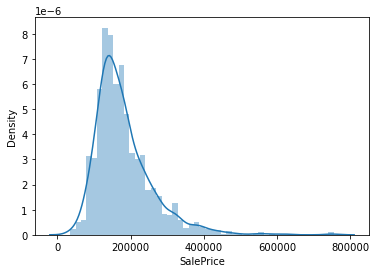

In [98]:
sns.distplot(data['SalePrice'])

uji normalitas untuk menentukan apakah data berdistribusi secara normal dengan metode jarque-bera

In [99]:
stat, p = st.jarque_bera(data['SalePrice'])
if p>0.05:
    print('terima Ho, data berdistribusi normal')
else:
    print('tolak Ho, data tidak berdistribusi normal')

tolak Ho, data tidak berdistribusi normal


## Lakukan pengujian hipotesis untuk harga rumah (Kolom: SalePrice) untuk menguji apakah rata rata harga rumah pada tahun 2008 tidak berbeda dengan rata rata harga tahun 2009? (Kolom: YrSold) Tentukan apakah parametric/non-parametric testing yang diperlukan!

Berikut adalah rata-rata dari data

In [100]:
Data2008 = data[data['YrSold']==2008][['SalePrice']] #data tahun 2008
Data2008.mean()


SalePrice    177360.838816
dtype: float64

In [101]:
Data2009 = data[data['YrSold']==2009][['SalePrice']] #data tahun 2009
Data2009.mean()

SalePrice    179432.10355
dtype: float64

Berikut adalah bentuk grafik dari data

<AxesSubplot:ylabel='Density'>

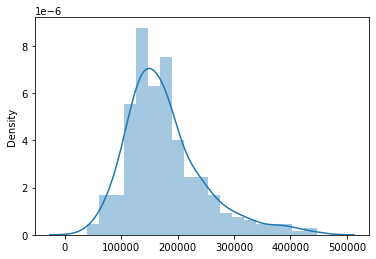

In [102]:
sns.distplot(Data2008) #grafik tahun 2008

<AxesSubplot:ylabel='Density'>

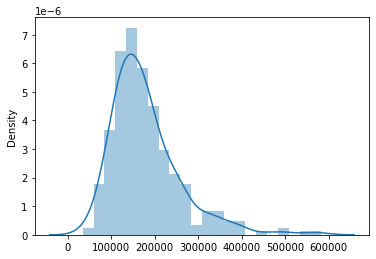

In [103]:
sns.distplot(Data2009) #grafik tahun 2009

Uji normalitas data tahun 2008 dan 2009 menggunakan Jarque-Bera untuk menentuka apakah kedua data berdistribusi normal secara teori

In [105]:
stat, p = st.jarque_bera(Data2008)
if p>0.05:
    print('terima Ho, data berdistribusi normal')
else:
    print('tolak Ho, data tidak berdistribusi normal')

tolak Ho, data tidak berdistribusi normal


In [106]:
stat, p = st.jarque_bera(Data2009)
if p>0.05:
    print('terima Ho, data berdistribusi normal')
else:
    print('tolak Ho, data tidak berdistribusi normal')

tolak Ho, data tidak berdistribusi normal


dikarenakan data tidak berdistribusi secara normal maka dilakukan uji statistika non parametrik, saya menggunakan uji mann whitney untuk pengujian hipotesis data

In [109]:
t, pvalue = st.mannwhitneyu(Data2008, Data2009)
print(pvalue)
if pvalue >= 0.01:
    print('Tidak cukup untuk menentang H0')
else:
    print('Cukup bukti untuk menentang H0')

[0.73603366]
Tidak cukup untuk menentang H0


Kesimpulan : kedua data dianggap sama (tidak berbeda) dalam uji hipotesis tersebut